In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import sys
sys.path.append('../src')  # Adjust the path as necessary
# sys.path.append('..')  # Adjust the path as necessary

# from SPTnano import ROISelector, process_directory, generate_file_tree, display_file_tree, overlay_tracks_with_movie, plot_histograms,  read_mat_file, add_microns_and_secs, add_unique_id, plot_particle_trajectory, plot_multiple_particles, filter_stubs
import SPTnano as spt
# from SPTnano import ROISelector, process_directory

master = spt.config.MASTER
saved_data = spt.config.SAVED_DATA

# import pixel size and frame rate
pixelsize_microns = spt.config.PIXELSIZE_MICRONS
time_between_frames = spt.config.TIME_BETWEEN_FRAMES
orderofconditions = spt.config.ORDEROFCONDITIONS
features = spt.config.FEATURES
# features2 = spt.config.FEATURES2
FEATURES2 = spt.config.FEATURES2

min_track_length = spt.config.TIME_WINDOW

from IPython.display import Markdown, display
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from napari_animation import Animation

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import os
import glob
import nd2
import seaborn as sns
import colorcet

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

sns.set_context("notebook", rc={"xtick.labelsize": 10, "ytick.labelsize": 10})

Config module loaded. Master directory is: A:/mshannon/2025/March/FIGURE1/


In [2]:

master = 'A:/mshannon/2025/March/FIGURE1/2_20_2025_MyosinEScells_RUES2_HTT72CAG_HTTKO_10ms_analyze'
savedir = 'D:/TEST/'
# load the df
test_df = pd.read_csv(os.path.join(savedir, 'test_df.csv'))

In [ ]:
## Takes a filename df

spt.plot_tracks_static_svg(
    file_df,
    filename=None,
    file_id=None,
    location=None,
    condition=None,
    time_start=None,
    time_end=None,
    color_by='motion_class',
    motion_type=None,  # New parameter
    overlay_image=False,
    master_dir=directory,
    scale_bar_length=2,           # in microns
    scale_bar_color='black',
    scale_bar_thickness=2,        # thickness of the scale bar
    transparent_background=True,
    save_path=directory + 'staticplots/',
    display_final_frame=True,
    max_projection=False,
    contrast_limits=None,         # Tuple: (lower, upper) or None for auto
    invert_image=False,
    # pixel_size_um=config.PIXELSIZE_MICRONS,  # microns per pixel conversion factor
    # frame_interval=config.TIME_BETWEEN_FRAMES,
    gradient=False,  # (gradient effect not applied when drawing a single polyline)
    colorway='Dark2',
    order=['subdiffusive', 'normal','superdiffusive'],      # New parameter: Order for categorical coloring
    figsize=(3,3),  # figure size in inches
    plot_size_um=10,  # final data range (in microns)
    line_thickness=0.6,  # thickness of track lines
    dpi=200,
    export_format='svg',    # 'png' or 'svg'
    return_svg=False,       # if True and exporting as SVG, return the SVG string
    show_plot=False          # whether to show the plot after saving/exporting
)    

In [ ]:
# Gallery of tracks by motion class

spt.plot_tracks_by_motion_class(
    time_windowed_df, 
    metrics_df, 
    num_tracks=40, 
    colormap='Dark2', 
    axis_range=None, 
    show_annotations=False, 
    order=['subdiffusive', 'normal', 'superdiffusive'], 
    transparent_background=True, 
    annotation_color="white",
    text_size=16, 
    figsizemultiplier=5,  # Overall figure size multiplier for adaptable subplot size

)

In [5]:
spt.napari_visualizer(
    test_df,
    master_dir=test_df.folder_name.unique()[0],
    condition=None,
    cell=None,
    location=None,
    save_movie_flag=False,
    save_as_png = True,

    feature='speed_um_s',         # feature to use for coloring
    # steps=99,
    steps=50,                 # number of steps to show in the movie
    tail_length=300, #max is 300
    tail_width=2,

    smoothing=True,
    smoothing_window=5, #something like this is good

    colormap='viridis',#'klein_gold',         # can be any matplotlib colormap name or a pre-built LUT
    path_to_alt_lut=  'D:/customLUTs/JDM_Ink Wash Yellow.lut',

    invert_raw=False,
    invert_colors=False, # doesn't work right now. FIXING 1. DONE
    time_coloring=True,
    

    frame_range=None, # WORKS FOR TRACKS AND NOT IMAGE. FIXING 2. DONE

    show_raw=True,

    timer_overlay=True,
    timer_format="{time:.2f}s",


    track_symbol='circle',
    head_size=1,
    head_symbol='o', #available are: arrow, clobber cross diamond disc hbar ring square star tailed_arrow triangle_down triangle_up vbar x SPECIAL ONE IS: shape_arrow
    head_color=None,
    show_track_head=True,


    background='dark',
    scale_bar=True #CHECKU. FIXING 4. 
)

Timer DataFrame created with time_s values interpolated.
[LUT] Loaded custom LUT from: D:/customLUTs/JDM_Ink Wash Yellow.lut
Image shape: (5744, 150, 150)


c:\Users\User\miniforge3\envs\nanoSPT\Lib\site-packages\napari\layers\tracks\tracks.py:620: UserWarning: Previous color_by key 'time_norm' not present in features. Falling back to track_id
  warn(


Saving PNG frames to: A:/mshannon/2025/March/FIGURE1/2_21_2025_KinesinEScells_RUES2_HTT72CAG_HTTKO_10ms_analyze\png_frames
PNG frames saved to A:/mshannon/2025/March/FIGURE1/2_21_2025_KinesinEScells_RUES2_HTT72CAG_HTTKO_10ms_analyze\png_frames with 50 frames.


In [ ]:
spt.plot_contour_timelapse_datashader(
    df, #Must be a single cell (filter a df by filename)
    time_col='time_s',
    value_col='diffusion_coefficient',
    time_bin=0.6,                 # Duration of each time window
    smooth_time_bins=0.3,         # Overlap between windows
    spatial_unit='microns',      # 'pixels' or 'microns'
    canvas_resolution=600,       # Resolution (in pixels) for Datashader Canvas
    output_format='png',         # 'gif' or 'png'
    export_path=newpath,
    cmap=colorcet.fire,          # Default colormap (from colorcet)
    # box_size_pixels=DEFAULT_BOX_SIZE_PIXELS,
    # microns_per_pixel=DEFAULT_MICRONS_PER_PIXEL,
    gif_playback=None,           # Frame duration override (in seconds)
    time_between_frames=0.01,    # Default frame duration if gif_playback is None
    overlay_contour_lines=True,  # Only used in the matplotlib branch
    show_colorbar=True,          # Only used with matplotlib's contouring branch
    contour_levels=200,          # Number of contour levels (for matplotlib branch)
    spatial_smoothing_sigma=1.0, # Gaussian sigma for spatial smoothing (0 disables)
    edge_angle_bins=180,         # For computing the cell edge
    edge_padding=0.05,           # Padding for cell edge computation
    edge_smoothing=0.1,          # Smoothing factor for cell edge computation
    remove_axes=False,           # If True, remove axes from the figure
    use_log_scale=True,         # If True, use logarithmic scaling
    use_datashader=True          # If True, use datashader native shading; otherwise, use Matplotlib contourf
)

SVG plots of tracks go here

In [ ]:
master_dir = 'D:/FIGURE1/plots/'



spt.plot_boxplots_svg(master_time_windowed_df_median, feature, x_category, font_size=9, order=order, palette='colorblind', 
                  background='white', transparent=True, line_color='black', show_plot=True, 
                  master_dir=master_dir, grid=True, bw=False, strip=True, y_max=None, figsize=(3.2, 3.4), 
                  annotate_median=True, rotation=90, dotsize=2, export_format='svg', return_svg=False, annotatemultiplier = 0.93)

In [ ]:
spt.plot_stacked_bar_svg(master_time_windowed_df, x_category, order=order, font_size=9, colormap='Dark2', figsize=(4.2, 3.4), 
                     background='white', transparent=True, line_color='black',
                     export_format='svg', master_dir=master_dir, show_plot=True, return_svg=False)

In [6]:
df = pd.read_csv('D:/MAP_THE_D_TEST/Kinesin_time_windowed_df.csv')

SVG histos go here

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


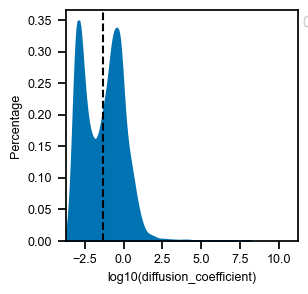

In [12]:
spt.plot_histograms(df, 'diffusion_coefficient', bins=100, separate=None, xlimit=None, small_multiples=False, palette='colorblind',
                    use_kde=True, kde_fill=True, show_plot=True, master_dir=None, tick_interval=5, average='mean', order=None, 
                    grid=False, background='white', transparent=False, condition_colors = None, line_color='black', font_size=9, showavg=True,
                    export_format='svg', return_svg=False, x_range=None, y_range=None, percentage=True, 
                    log_scale=True, log_base=10, alpha=1, log_axis_label='log', save_folder=None, figsize=(3,3))